# LOOPING DICE-9

- DITHER: This creates a square of 8 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 -  pattern_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - random_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_9 pattern. Default is 9 loop.
 - plot: a True or False input to say if user would like to plot coordinates. Default is False (no plot)
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice9(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], pattern_offset=0.5\*u.deg, random_offset=0.1\*u.deg, loop=27, plot=False)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.21891526, -29.87671053), (204.49934084, -29.73726955),
     (204.43308685, -29.83475216), (204.42331314, -30.01979064),
     (204.27650851, -30.0118251), (204.09754911, -30.09239407),
     (204.03148606, -29.90582738), (204.03960528, -29.69772879),
     (204.1927693, -29.71498524), (204.2753193, -29.85566435),
     (204.47535416, -29.65229094), (204.41571669, -29.86420727),
     (204.48364426, -30.00496337), (204.26027842, -30.0155069),
     (204.01177405, -30.00663879), (204.00676428, -29.9152537),
     (204.06960014, -29.72463129), (204.30628131, -29.64802726),
     (204.22699434, -29.87759795), (204.46388592, -29.69710784),
     (204.48382963, -29.84278797), (204.44414494, -30.07169583),
     (204.25515505, -30.03140696), (204.10095426, -29.99570943),
     (204.10339959, -29.85423913), (204.00581333, -29.67667819),
     (204.28867194, -29.73817803)]>


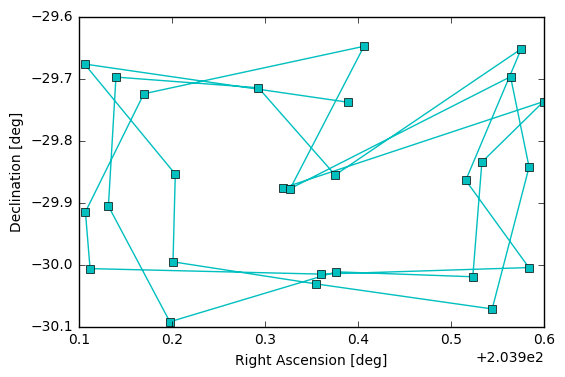

In [1]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import itertools
import math
import random
import matplotlib.pyplot as plt


ra = '13 37 00'
dec = '-29 51 56.74'
ra_dec=SkyCoord('%s %s' %(ra, dec), unit=(u.hourangle,u.deg))
pattern_offset = 0.5 * u.deg
random_offset = 0.1 * u.deg
loop = 27


def dither_dice9(ra_dec, pattern_offset, random_offset= 0 * u.arcsec, loop=9, plot=False):
    if not isinstance(pattern_offset, u.Quantity):
        pattern_offset = pattern_offset * u.arcsec
    if not isinstance(random_offset, u.Quantity):
        random_offset = random_offset * u.arcsec
    ra = ra_dec.ra
    dec = ra_dec.dec
    number = math.ceil(loop / 9.0)
    # 0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    pattern_ra = (((0.5 * 2 ** 0.5) * pattern_offset) * 0.5) / (np.cos(dec))
    pattern =((0.5 * 2 ** 0.5) * pattern_offset) * 0.5
    random_ra = (random_offset * 0.5) / (np.cos(dec))
    random_dec = (random_offset * 0.5)
    # Dither
    RA_list = [ra]
    DEC_list = [dec]
    for i in range(number):
        ra1 = ra + (pattern_ra)
        RA_list.append(ra1)
        dec1 = dec + (pattern)
        DEC_list.append(dec1)

        ra2 = ra + (pattern_ra)
        RA_list.append(ra2)
        DEC_list.append(dec)

        ra3 = ra + (pattern_ra)
        RA_list.append(ra3)
        dec3 = dec - (pattern)
        DEC_list.append(dec3)

        RA_list.append(ra)
        dec4 = dec - (pattern)
        DEC_list.append(dec4)

        ra5 = ra - (pattern_ra)
        RA_list.append(ra5)
        dec5 = dec - (pattern)
        DEC_list.append(dec5)

        ra6 = ra - (pattern_ra)
        RA_list.append(ra6)
        DEC_list.append(dec)

        ra7 = ra - (pattern_ra)
        RA_list.append(ra7)
        dec7 = dec + (pattern)
        DEC_list.append(dec7)

        RA_list.append(ra)
        dec8 = dec + (pattern)
        DEC_list.append(dec8)


        RA_list.append(ra)
        DEC_list.append(dec)

    RA_final_list = RA_list[:loop]
    DEC_final_list = DEC_list[:loop]
    # Random
    LISTra = []
    LISTdec = []
    for i in range(0, len(RA_final_list)):
        RA_offset = RA_final_list[i] + (random.uniform(-random_ra, random_ra))
        LISTra.append(RA_offset)
        DEC_offset = DEC_final_list[i] + (random.uniform(-random_dec, random_dec))
        LISTdec.append(DEC_offset)
    All = SkyCoord(LISTra, LISTdec)
    print (All)
    if plot is True:
        plt.plot(All.ra, All.dec, 'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All9=dither_dice9(ra_dec, pattern_offset, random_offset, loop, True)

# LOOPING DICE-5

- DITHER: This creates a square of 4 points around the central designated point
- RANDOM: The random selection in a small region around the designated points in the dither list such that no point is selected twice, to produce a more accurate image.
- REQUIRED: 
 - ra_dec: a RA and DEC created using 'SkyCoord'
 - pattern_offset: an offset for how far around the point you would like to dither. Default is 30*u.arcsec.
 - random_offset: an offset for the defined small region around the points defined in the dither list. Default is 0*u.arcsec
 - loop: a loop for how many times you would like to dither with the DICE_5 pattern. Default is 5 loop.
 - plot: a True or False input to say if user would like to plot coordinates. Default is False (no plot)
- RETURNS: 'SkyCoord' as a list and a plot of coordinate positions

#### - Example: dither_dice5(ra_dec='13 37 00' , '-29 51 56.74' [in SkyCoords], pattern_offset=0.5\*u.deg,random_offset=0.1\*u.deg, loop=10, plot=True)

<SkyCoord (ICRS): (ra, dec) in deg
    [(204.20771582, -29.84304399), (204.46786144, -29.70627461),
     (204.44466144, -30.02026337), (204.08066495, -30.01781758),
     (204.0854665, -29.6814311), (204.19474375, -29.83847472),
     (204.47360339, -29.65993359), (204.48922356, -30.00706899),
     (203.98863802, -30.05959677), (204.02962023, -29.65464337)]>


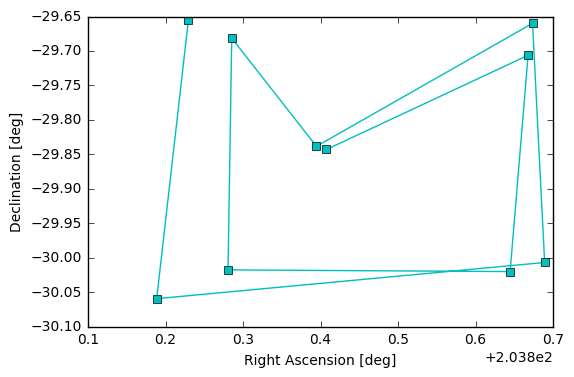

In [2]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import math
import random
import itertools
import matplotlib.pyplot as plt

ra='13 37 00'
dec='-29 51 56.74'
ra_dec=SkyCoord('%s %s'%(ra, dec), unit=(u.hourangle,u.deg))
pattern_offset=0.5*u.deg
random_offset=0.1*u.deg
loop=10

def dither_dice5(ra_dec, pattern_offset, random_offset= 0 * u.arcsec, loop=5, plot=False):
    if not isinstance(pattern_offset, u.Quantity):
        pattern_offset = pattern_offset * u.arcsec
    if not isinstance(random_offset, u.Quantity):
        random_offset = random_offset * u.arcsec
    ra = ra_dec.ra
    dec = ra_dec.dec
    number = math.ceil(loop / 5.0)
    # 0.5*2**0.5 is due to adjacent side in a right angle triangle (cos45)
    pattern_ra = (((0.5 * 2 ** 0.5) * pattern_offset) * 0.5) / (np.cos(dec))
    pattern =((0.5 * 2 ** 0.5) * pattern_offset) * 0.5
    random_ra = (random_offset * 0.5) / (np.cos(dec))
    random_dec = (random_offset * 0.5)
    # Dither
    RA_list = [ra]
    DEC_list = [dec]
    for i in range(number):
        ra1 = ra + (pattern_ra)
        RA_list.append(ra1)
        dec1 = dec + (pattern)
        DEC_list.append(dec1)

        ra2 = ra + (pattern_ra)
        RA_list.append(ra2)
        dec2 = dec - (pattern)
        DEC_list.append(dec2)

        ra3 = ra - (pattern_ra)
        RA_list.append(ra3)
        dec3 = dec - (pattern)
        DEC_list.append(dec3)

        ra4 = ra - (pattern_ra)
        RA_list.append(ra4)
        dec4 = dec + (pattern)
        DEC_list.append(dec4)

        RA_list.append(ra)
        DEC_list.append(dec)

    RA_final_list = RA_list[:loop]
    DEC_final_list = DEC_list[:loop]
    # Random
    LISTra = []
    LISTdec = []
    for i in range(0, len(RA_final_list)):
        RA_offset = RA_final_list[i] + (random.uniform(-random_ra, random_ra))
        LISTra.append(RA_offset)
        DEC_offset = DEC_final_list[i] + (random.uniform(-random_dec, random_dec))
        LISTdec.append(DEC_offset)
    All = SkyCoord(LISTra, LISTdec)
    print (All)
    if plot is True:
        plt.plot(All.ra, All.dec, 'c-s')
        plt.ylabel('Declination [deg]')
        plt.xlabel('Right Ascension [deg]')
        plt.show()
    return All

All5=dither_dice5(ra_dec, pattern_offset, random_offset, loop, True)